In [8]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import csv
import sys
sys.path.append("..")

from Code.VQLSSVM import VQLSSVM
from Code.Utils import prepareDataset

np.set_printoptions(precision=4, suppress=True)

In [9]:
qubits = 3
shots: int = 10000
gamma: float = 0.01 # regularization parameter
subsetSize: int = 2**qubits - 1 # number of training points
classToFilterOut: int = 2

In [10]:
xTrain, xTest, yTrain, yTest = prepareDataset(normalizeValues=True, dataset="breastCancer",subsetSize=subsetSize, classToFilterOut=classToFilterOut)
print(xTrain)
print(yTrain)

[[-0.4303 -0.2513 -0.451  -0.6811  0.099  -0.6533 -0.853  -0.7371  0.4949
  -0.5404 -0.7764 -0.5749 -0.8006 -0.8955 -0.6394 -0.8623 -0.9016 -0.5632
  -0.3913 -0.9559 -0.5567 -0.3555 -0.5975 -0.7879 -0.227  -0.8385 -0.8704
  -0.5673 -0.357  -0.8779]
 [-0.3943  0.421  -0.4119 -0.649  -0.281  -0.6633 -0.8679 -0.6755 -0.6818
  -0.5703 -0.8339 -0.3088 -0.8558 -0.9173 -0.7193 -0.8467 -0.9599 -0.6542
  -0.7817 -0.8556 -0.4934  0.5773 -0.539  -0.7442 -0.3921 -0.7772 -0.8881
  -0.4665 -0.7512 -0.7152]
 [-0.5609 -0.4271 -0.5496 -0.7749  0.1713 -0.2091 -0.522  -0.4469 -0.0939
  -0.0484 -0.7837 -0.3901 -0.7861 -0.9214 -0.1245 -0.5523 -0.7494 -0.3025
  -0.7133 -0.7014 -0.6137 -0.2868 -0.6242 -0.8314  0.4109 -0.4945 -0.4911
  -0.0268 -0.5683 -0.506 ]
 [ 0.2494 -0.0355  0.3808 -0.0655  0.3717  1.      0.7591  0.5944  0.8646
   0.3252 -0.406  -0.326  -0.2563 -0.5906 -0.4107 -0.0071 -0.449  -0.0176
   1.     -0.6481  0.0985  0.0501  0.1942 -0.2933  0.2247  0.1431  0.227
   0.7237  0.5277 -0.4149]
 [-0.

# VQLS-LSSVM state vectors

Condition number of the matrix:  3614.464592944054
LS-SVM Matrix:
 [[  0.       1.       1.       1.       1.       1.       1.       1.    ]
 [  1.     113.032   11.8378   9.5537  -0.0881  14.512    9.1626  10.5596]
 [  1.      11.8378 113.995    9.1851  -1.8579  14.9937   9.4122  11.0649]
 [  1.       9.5537   9.1851 108.9377  -0.0099  10.6132   7.5757   7.9299]
 [  1.      -0.0881  -1.8579  -0.0099 106.8431  -2.7562   0.3891  -0.0344]
 [  1.      14.512   14.9937  10.6132  -2.7562 122.0979  10.0265  11.5191]
 [  1.       9.1626   9.4122   7.5757   0.3891  10.0265 108.107    9.119 ]
 [  1.      10.5596  11.0649   7.9299  -0.0344  11.5191   9.119  112.0439]]
['III', 'IIX', 'IIZ', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ',
 'XII', 'XIX', 'XIZ', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ',
 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI',
 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ']
Pauli matrix coeffitients [(98.13207920644498+0j), (4.13698727435855+0j), (-

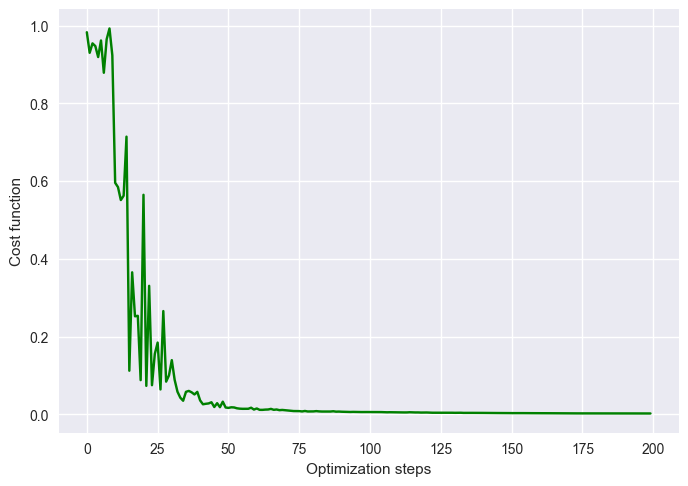

In [11]:
vqlssvmVectors: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmVectors.train(xTrain, yTrain, quantumSimulation=False, verbose=True, iterations = 200, method="COBYLA")
vqlssvmVectors.plotCost()

In [12]:
print(vqlssvmVectors.predict(xTest))

[ 0.0468+0.j  0.1   +0.j  0.0543+0.j  0.0579+0.j -0.1349+0.j  0.0495+0.j
  0.1394+0.j  0.1363+0.j  0.0941+0.j  0.1006+0.j  0.0853+0.j  0.1128+0.j
  0.0684+0.j  0.0446+0.j -0.0193+0.j  0.1033+0.j  0.0934+0.j  0.0684+0.j
  0.009 +0.j  0.0968+0.j  0.0751+0.j  0.1183+0.j  0.0895+0.j  0.0536+0.j
  0.0795+0.j  0.055 +0.j  0.1466+0.j  0.1208+0.j  0.0998+0.j  0.1218+0.j
  0.091 +0.j  0.079 +0.j  0.0644+0.j  0.0323+0.j  0.1292+0.j  0.0996+0.j
  0.1241+0.j  0.0236+0.j  0.0092+0.j -0.0066+0.j  0.079 +0.j  0.0713+0.j
  0.1562+0.j  0.1557+0.j  0.0379+0.j  0.1311+0.j  0.1511+0.j  0.1011+0.j
  0.1366+0.j  0.0641+0.j -0.0088+0.j  0.1398+0.j  0.084 +0.j  0.0865+0.j
  0.0738+0.j  0.0817+0.j  0.0832+0.j  0.0842+0.j  0.0994+0.j  0.0692+0.j
  0.0442+0.j -0.0892+0.j  0.1208+0.j  0.0674+0.j  0.1381+0.j  0.0571+0.j
  0.0949+0.j  0.0314+0.j  0.0091+0.j  0.0095+0.j -0.2301+0.j  0.2125+0.j
  0.0845+0.j  0.1285+0.j -0.1249+0.j  0.1028+0.j  0.059 +0.j  0.0243+0.j
  0.1244+0.j  0.1537+0.j  0.1357+0.j  0.0176+0.j -0

In [13]:
print("Accuracy:",vqlssvmVectors.accuracy(xTest, yTest))

Accuracy: 0.8202846975088968


# VQLS-LSSVM quantum

Condition number of the matrix:  3614.464592944054
LS-SVM Matrix:
 [[  0.       1.       1.       1.       1.       1.       1.       1.    ]
 [  1.     113.032   11.8378   9.5537  -0.0881  14.512    9.1626  10.5596]
 [  1.      11.8378 113.995    9.1851  -1.8579  14.9937   9.4122  11.0649]
 [  1.       9.5537   9.1851 108.9377  -0.0099  10.6132   7.5757   7.9299]
 [  1.      -0.0881  -1.8579  -0.0099 106.8431  -2.7562   0.3891  -0.0344]
 [  1.      14.512   14.9937  10.6132  -2.7562 122.0979  10.0265  11.5191]
 [  1.       9.1626   9.4122   7.5757   0.3891  10.0265 108.107    9.119 ]
 [  1.      10.5596  11.0649   7.9299  -0.0344  11.5191   9.119  112.0439]]
['III', 'IIX', 'IIZ', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ',
 'XII', 'XIX', 'XIZ', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ',
 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI',
 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ']
Pauli matrix coeffitients [(98.13207920644498+0j), (4.13698727435855+0j), (-

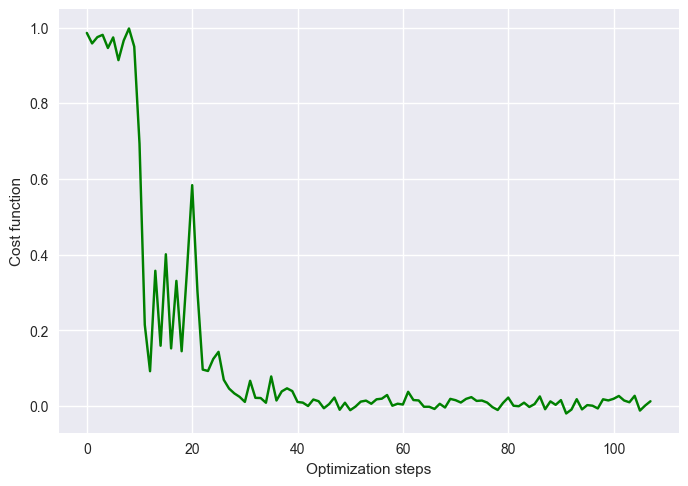

In [14]:
vqlssvmQuantum: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmQuantum.train(xTrain, yTrain, quantumSimulation=True, verbose=True, iterations = 200)

vqlssvmQuantum.plotCost()

In [15]:
costCOBYLA = vqlssvmQuantum.getCostHistory()

with open('../SimulationResults/costCOBYLA.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Iteration', 'CostFunction'])
    for i in range(len(costCOBYLA)):
        writer.writerow([i, costCOBYLA[i]])


In [16]:
print("Predictions:\n", vqlssvmQuantum.predict(xTest))
print("Accuracy: ", vqlssvmQuantum.accuracy(xTest, yTest))

Predictions:
 [ 0.0606+0.j  0.1157+0.j  0.0667+0.j  0.0712+0.j -0.1458+0.j  0.0613+0.j
  0.1569+0.j  0.1526+0.j  0.1093+0.j  0.1198+0.j  0.0988+0.j  0.1297+0.j
  0.0836+0.j  0.0564+0.j -0.0081+0.j  0.1205+0.j  0.1096+0.j  0.0815+0.j
  0.0227+0.j  0.1131+0.j  0.0881+0.j  0.1378+0.j  0.1052+0.j  0.069 +0.j
  0.0942+0.j  0.0696+0.j  0.1661+0.j  0.1336+0.j  0.1154+0.j  0.1388+0.j
  0.1078+0.j  0.0898+0.j  0.0776+0.j  0.0457+0.j  0.1464+0.j  0.1172+0.j
  0.1422+0.j  0.0337+0.j  0.0163+0.j  0.0051+0.j  0.0937+0.j  0.0849+0.j
  0.1774+0.j  0.1756+0.j  0.0515+0.j  0.147 +0.j  0.1707+0.j  0.1166+0.j
  0.153 +0.j  0.0794+0.j -0.0002+0.j  0.1569+0.j  0.0994+0.j  0.1008+0.j
  0.088 +0.j  0.0977+0.j  0.0985+0.j  0.0985+0.j  0.1124+0.j  0.0818+0.j
  0.058 +0.j -0.0801+0.j  0.1357+0.j  0.0846+0.j  0.1565+0.j  0.071 +0.j
  0.1124+0.j  0.0424+0.j  0.0196+0.j  0.0218+0.j -0.2478+0.j  0.2339+0.j
  0.1004+0.j  0.1437+0.j -0.1274+0.j  0.1202+0.j  0.0733+0.j  0.0363+0.j
  0.1429+0.j  0.1712+0.j  0.153 +0.j 

# LSSVM (work in progresss)

In [17]:
# lssvmMatrix1: np.ndarray = lssvmMatrix(xTrain, gamma, "linearKernel")
# yVector: np.array = prepareLabels(yTrain)
# print(yVector)
# print ("Condition number of the matrix: ", np.linalg.cond(lssvmMatrix1))
# print("LS-SVM Matrix:\n", lssvmMatrix1)
# print(yVector)

# solution: np.array = np.linalg.solve(lssvmMatrix1, yVector)
# print("Solution:", solution)
# print ("Norm of the solution: ",solution/np.linalg.norm(solution))

# bias: float = solution[0]
# weights: np.array = solution[1:]

# vqlssvmLSSVM: VQLSSVM = VQLSSVM(gamma,10)
# vqlssvmLSSVM.xTrain = xTrain
# vqlssvmLSSVM.xTrainSize = xTrain.shape[0]
# vqlssvmLSSVM.weights = weights
# vqlssvmLSSVM.b = bias
# predictions: np.array = vqlssvmLSSVM.predict(xTest)
# classVals = [vqlssvmLSSVM.assignClass(i) for i in predictions]
# print("Predictions:", predictions)
# print("Class values:", classVals)
# print("yTest:", yTest)
# # print(yTest)
# print("Accuracy:", vqlssvmLSSVM.accuracy(xTest, yTest))

# Classical SVM

In [18]:
clf = SVC(kernel='linear')
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)
print("Accuracy:", accuracy_score(yTest, yPred))

Accuracy: 0.902135231316726


In [35]:
np.set_printoptions(precision=0, suppress=True)
class TriangleMatrix:
    def __init__(self, length: int, array: np.array = None) -> None:
        self.length = length
        if array is not None:
            if len(array) == int(length * (length + 1) / 2):
                self.array = array
            else: 
                raise Exception("Invalid array length")
        else:
            self.array = np.zeros(int(length * (length + 1) / 2))

    def getIndex(self, i: int, j: int) -> int:
        if i > j:
            raise Exception("Invalid index")
        else:
            return int(i*(1-i + 2 * self.length) / 2) + (j - i)

    def setElement(self, i: int, j: int, value: float):
        index = self.getIndex(i, j)
        self.array[index] = value

    def getElement(self, i: int, j: int) -> float:
        index = self.getIndex(i, j)
        return self.array[index]

    def print(self):
        for i in range(self.length):
            for j in range(self.length):
                try:
                    print(self.getElement(i, j), end=" ")
                except:
                    print("*", end=" ")

            print("")
    

triangleMatrix = TriangleMatrix(5)

triangleMatrix.setElement(0, 0, 1)
triangleMatrix.setElement(0, 1, 2)
triangleMatrix.setElement(0, 2, 3)
triangleMatrix.setElement(0, 3, 4)
triangleMatrix.setElement(0, 4, 5)
triangleMatrix.setElement(1, 1, 6)
triangleMatrix.setElement(1, 2, 7)
triangleMatrix.setElement(1, 3, 8)
triangleMatrix.setElement(1, 4, 9)
triangleMatrix.setElement(2, 2, 10)
triangleMatrix.setElement(2, 3, 11)
triangleMatrix.setElement(2, 4, 12)
triangleMatrix.setElement(3, 3, 13)
triangleMatrix.setElement(3, 4, 14)
triangleMatrix.setElement(4, 4, 15)

triangleMatrix.print()

# numbers from 1 to 15 list
numbers = list(range(1, 16))

triangleMatrix1 = TriangleMatrix(5, numbers)
triangleMatrix1.print()



1.0 2.0 3.0 4.0 5.0 
* 6.0 7.0 8.0 9.0 
* * 10.0 11.0 12.0 
* * * 13.0 14.0 
* * * * 15.0 
1 2 3 4 5 
* 6 7 8 9 
* * 10 11 12 
* * * 13 14 
* * * * 15 
